# **Bitext Retail‑Ecommerce LLM Chatbot Training**


---



***Install & Import Libraries***

In [ ]:
!pip install datasets matplotlib scikit-learn tensorflow

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

***Load Dataset***

In [ ]:
from datasets import load_dataset

# Load Bitext Retail-Ecommerce dataset
dataset = load_dataset("bitext/Bitext-retail-ecommerce-llm-chatbot-training-dataset")
df = dataset['train'].to_pandas()

# Display sample
print("Total rows:", len(df))
print(df.head())

# Columns: instruction, response, intent
texts = df['instruction'].astype(str).tolist()
labels = df['intent'].astype(str).tolist()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

bitext-retail-ecommerce-llm-chatbot-trai(…):   0%|          | 0.00/42.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/44884 [00:00<?, ? examples/s]

Total rows: 44884
                                         instruction       intent category  \
0                   I got to add an item to the cart  add_product     CART   
1  wanna add fucking products to the basket can h...  add_product     CART   
2    i have to add products to the basket i ned help  add_product     CART   
3  di like to add products to the cart could i ge...  add_product     CART   
4  I need to add an item to the cart , where do I...  add_product     CART   

       tags                                           response  
0        BL  I'll get right on it! I'm here to assist you i...  
1   BCIMQWZ  I sincerely apologize if you've encountered an...  
2     BCMQZ  You bet! I'm here to assist you in adding prod...  
3  BCILMPQZ  Indeed! I'm here to assist you in adding produ...  
4     BCILZ  I'll take care of it! I'm here to help you wit...  


***Encode Labels***

In [ ]:
le = LabelEncoder()
y = le.fit_transform(labels)
num_classes = len(le.classes_)
print("Number of intents/classes:", num_classes)


Number of intents/classes: 46


***Train/Test Split***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    texts, y, test_size=0.2, random_state=42, stratify=y
)

print("Training samples:", len(X_train))
print("Test samples:", len(X_test))


Training samples: 35907
Test samples: 8977


***Tokenize & Pad Sequences***

In [ ]:
# Tokenizer
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


***CNN Text Classifier***

In [ ]:
model = models.Sequential([
    layers.Embedding(input_dim=20000, output_dim=128, input_length=max_len),
    layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

***Training Model***

In [ ]:
history = model.fit(
    X_train_pad, y_train,
    epochs=15,   # increase epochs later if needed
    batch_size=32,
    validation_split=0.2
)


Epoch 1/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9848 - loss: 0.0430 - val_accuracy: 0.9890 - val_loss: 0.0522
Epoch 2/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.9896 - val_loss: 0.0542
Epoch 3/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9882 - loss: 0.0347 - val_accuracy: 0.9907 - val_loss: 0.0473
Epoch 4/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9900 - loss: 0.0290 - val_accuracy: 0.9897 - val_loss: 0.0562
Epoch 5/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9890 - loss: 0.0299 - val_accuracy: 0.9901 - val_loss: 0.0538
Epoch 6/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9896 - loss: 0.0273 - val_accuracy: 0.9894 - val_loss: 0.0577
Epoch 7/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9884 - val_loss: 0.0635
Epoch 8/15
898/898 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9889 - loss: 0.0308 - val_accuracy: 0.

***Plot Training History***

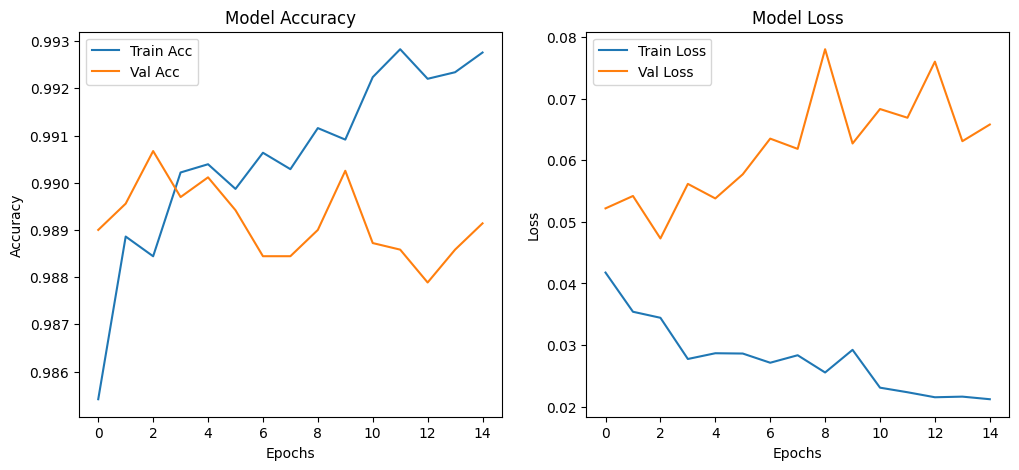

In [ ]:
# Accuracy and Loss plots
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


***Confusion Matrix***

281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


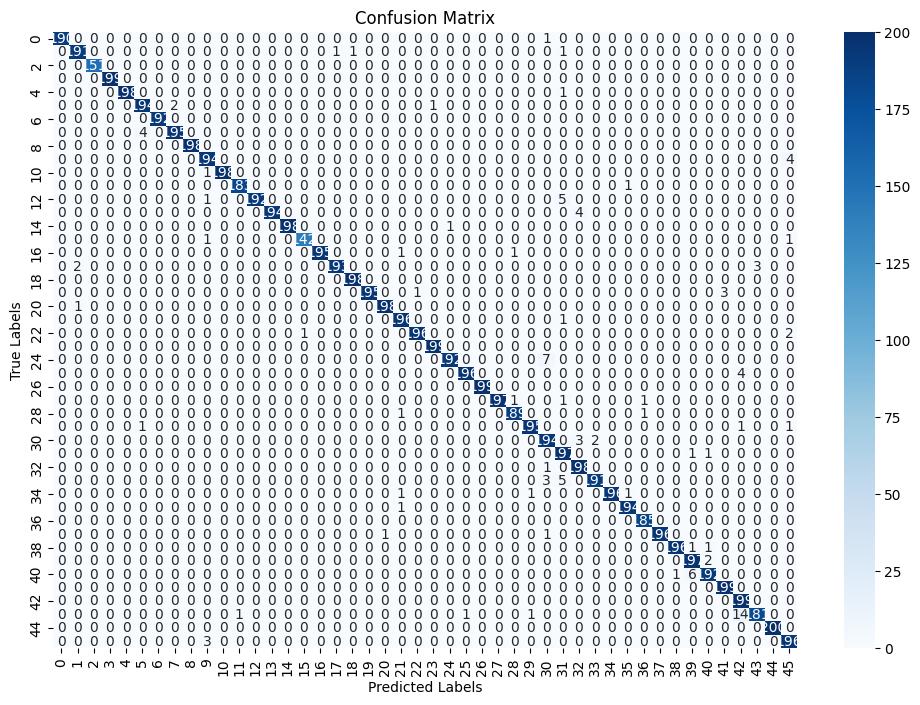

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       191
           1       0.98      0.98      0.98       194
           2       1.00      1.00      1.00       151
           3       1.00      1.00      1.00       199
           4       1.00      0.99      1.00       199
           5       0.97      0.98      0.98       197
           6       1.00      1.00      1.00       192
           7       0.99      0.98      0.98       199
           8       1.00      1.00      1.00       198
           9       0.97      0.98      0.97       198
          10       1.00      0.99      1.00       199
          11       0.99      0.99      0.99       184
          12       1.00      0.97      0.98       198
          13       1.00      0.98      0.99       198
          14       1.00      0.99      1.00       199
          15       0.99      0.99      0.99       144
          16       1.00      0.99      0.99       197
          17       0.99    

In [ ]:
# Predict probabilities (2D output because you have softmax)
y_pred = model.predict(X_test_pad)  # <-- corrected variable

# Convert to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix with numbers displayed
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")  # annot=True shows counts
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_labels))



***Report in DataFrame***

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate report
report_dict = classification_report(y_test, y_pred, target_names=le.classes_, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display nicely
pd.set_option('display.max_rows', None)   # show all rows
pd.set_option('display.float_format', '{:.2f}'.format)
report_df


,precision,recall,f1-score,support
add_product,1.00,0.99,1.00,191.00
availability,0.98,0.98,0.98,194.00
availability_in_store,1.00,1.00,1.00,151.00
availability_online,1.00,1.00,1.00,199.00
cancel_order,1.00,0.99,1.00,199.00
change_account,0.97,0.98,0.98,197.00
change_order,1.00,1.00,1.00,192.00
close_account,0.99,0.98,0.98,199.00
customer_service,1.00,1.00,1.00,198.00
damaged_delivery,0.97,0.98,0.97,198.00
